# a)


In [13]:
import sympy
import numpy as np
import pandas as pd
x = sympy.symbols("x")
f1 = 27/8* x + (1-x) * (1.02**3)
f2 = 3/2 * x + (1-x) * (1.02**3)
f3 = 2/3 * x + (1-x) * (1.02**3)
f4 = 8/27* x + (1-x) * (1.02**3)
e = 1/8 * (27/8 - 1.02**3)/f1 + 3/8 *(3/2 - 1.02**3)/f2 +3/8 *(2/3 - 1.02**3)/f3 + 1/8 * (8/27 - 1.02**3)/f4
print(sympy.solve([e],[x]))                                                     

[(-1.21066032317443 + 0.e-21*I,), (0.37191830702661 + 0.e-23*I,), (1.82089918915981 - 0.e-23*I,)]


In [10]:
w1 = 0.37191830702661
util1 = 1/8 * sympy.log(f1) + 3/8 * sympy.log(f2) + 3/8 * sympy.log(f3) + 1/8 * sympy.log(f4)
util1.evalf(subs = {'x' : w1})

0.0924619385123415

# b)

In [11]:
w2 = 0.1292 / 0.3392
u = (1-w2)*1.02 + 1.5*w2
d = (1-w2)*1.02 + 2/3*w2

from math import log
1/8 * log(u**3) + 3/8 * log(u*u*d) + 3/8 * log(u*d*d) + 1/8 * log(d**3)

0.09447050326334072

# c)

In [19]:
returns = np.random.normal(0.0833,0.2,10000)
table = pd.DataFrame(columns= ['avrg_u'],index = [i/100 for i in range(1,101)])
for x in range(1,101):
    weight = x/100
    utility = np.log((returns+1)*weight + (1-weight)*1.02)
    new_row = pd.DataFrame({'avrg_u':utility.mean()}, index = [weight])
    table.update(new_row)

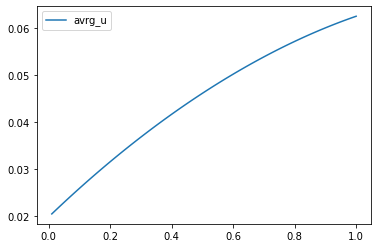

In [20]:
table.plot()

# d)

In [21]:
y1_r = np.random.normal(0.0833,0.2,10000)
y2_r = np.random.normal(0.0833,0.2,10000)
y3_r = np.random.normal(0.0833,0.2,10000)

cum_r = (1+y1_r) * (1+y2_r) * (1+y3_r) - 1

In [26]:
table_d = pd.DataFrame(columns= ['avrg_u'],index = [i/100 for i in range(1,101)])
for x in range(1,101):
    weight = x/100
    utility = np.log((cum_r+1)*weight + (1-weight)*1.02)
    new_row = pd.DataFrame({'avrg_u':utility.mean()}, index = [weight])
    table_d.update(new_row)

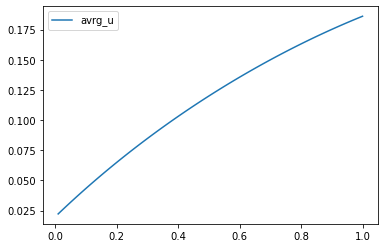

In [27]:
table_d.plot()

# f)

In [28]:
mkt_ret = pd.read_csv('assignment5a.csv')

In [41]:
count = 0
three_year_rets = []
ret = 0
for yr in range(0,len(mkt_ret)):
    count += 1
    ret = (1+mkt_ret["VW Market Return"][yr]) * (1+ret) - 1
    if (count == 3):
        three_year_rets.append(ret)
        ret = 0
        count = 0
three_year_rets = np.asarray(three_year_rets)

In [43]:
table_f = pd.DataFrame(columns= ['avrg_u'],index = [i/100 for i in range(1,101)])
for x in range(1,101):
    weight = x/100
    utility = np.log((three_year_rets+1)*weight + (1-weight)*1.02)
    new_row = pd.DataFrame({'avrg_u':utility.mean()}, index = [weight])
    table_f.update(new_row)

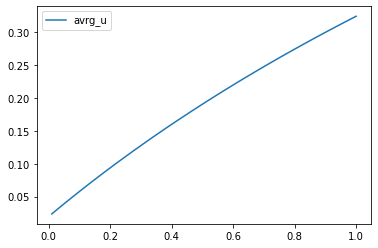

In [44]:
table_f.plot()